# 📈 OBV (On-Balance Volume) Indicator

This notebook introduces the **OBV (On-Balance Volume)** indicator using Yahoo Finance data and Pandas. OBV measures buying and selling pressure as a cumulative indicator by adding volume on up days and subtracting on down days.

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ticker = "AAPL"
stock = yf.Ticker(ticker)
df = stock.history(period="6mo")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-25 00:00:00-04:00,229.235479,232.707832,229.065854,230.901810,38802300,0.0,0.0
2024-10-28 00:00:00-04:00,232.807625,234.214517,232.039312,232.887436,36087100,0.0,0.0
2024-10-29 00:00:00-04:00,232.588105,233.815399,231.809819,233.156845,35417200,0.0,0.0
2024-10-30 00:00:00-04:00,232.099163,232.957275,229.045886,229.594681,47070900,0.0,0.0
2024-10-31 00:00:00-04:00,228.836355,229.325284,224.875072,225.413895,64370100,0.0,0.0


## 🧮 Calculate OBV

OBV is calculated by adding volume when the close is higher than the previous close, and subtracting volume when it is lower.

In [6]:
df["OBV"] = 0
direction = df["Close"].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df["OBV"] = (direction * df["Volume"]).fillna(0).cumsum()
df[['Close', 'OBV']].tail()

,Close,OBV
Date,,
2025-04-17 00:00:00-04:00,196.979996,-25949400
2025-04-21 00:00:00-04:00,193.160004,-72691900
2025-04-22 00:00:00-04:00,199.740005,-19715500
2025-04-23 00:00:00-04:00,204.600006,33213700
2025-04-24 00:00:00-04:00,208.369995,79994954


## 📊 Plot OBV vs Price

Visualize OBV compared to the stock's close price.

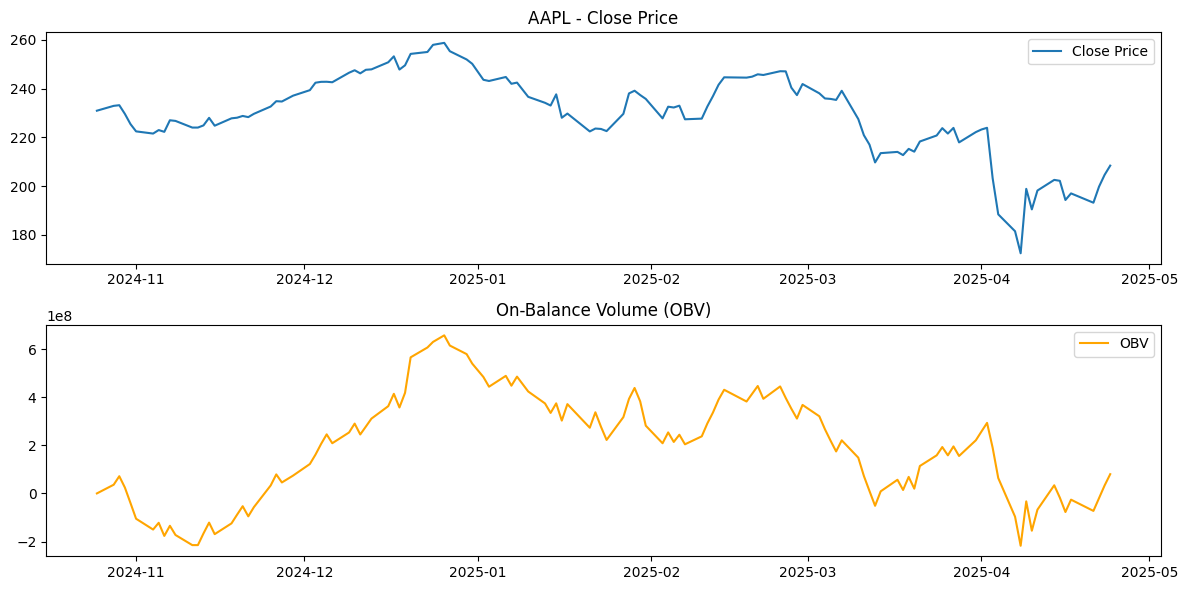

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.title(f'{ticker} - Close Price')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df['OBV'], color='orange', label='OBV')
plt.title('On-Balance Volume (OBV)')
plt.legend()
plt.tight_layout()
plt.show()

## 📌 Interpretation
- OBV is used to confirm price trends.
- Rising OBV with rising prices can indicate strong buying interest.
- Divergences between OBV and price can signal potential reversals.